In [9]:
import numpy as np
import pandas as pd

from src.SIR_model import SIR_model, SIR_model_with_lockdown

[STATS] Fatalities::  1566552
[STATS] Infected:: 20130158
[STATS] Recovered:: 63012146


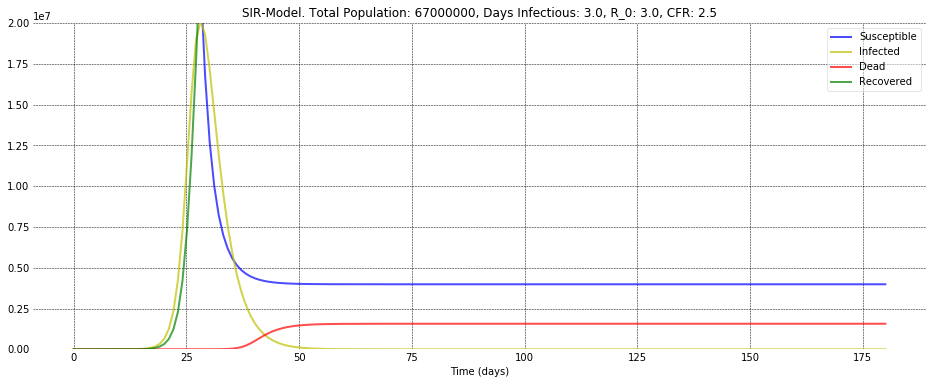

[STATS] Fatalities::  1566552
[STATS] Infected:: 20049839
[STATS] Recovered:: 63012146


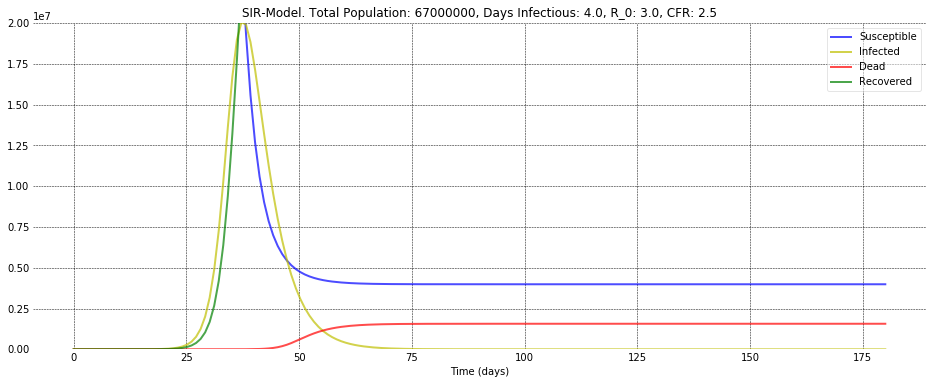

[STATS] Fatalities::  1566552
[STATS] Infected:: 20101574
[STATS] Recovered:: 63012146


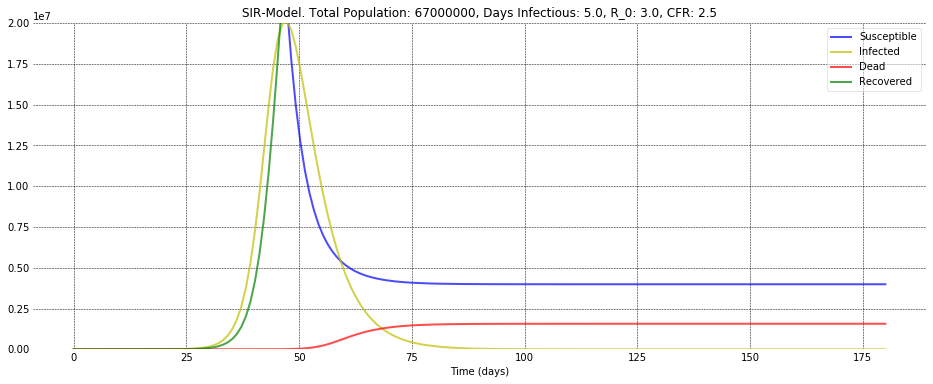

[STATS] Fatalities::  1566552
[STATS] Infected:: 20130158
[STATS] Recovered:: 63012144


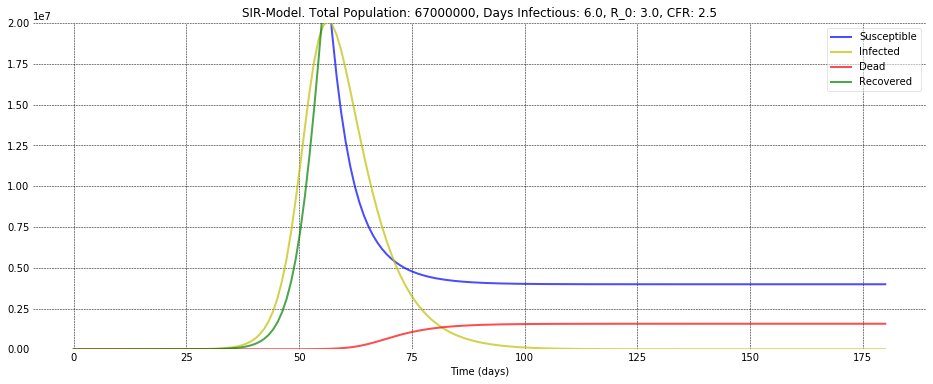

In [4]:
for D in np.arange(3.0,7.0, 1.0):
    SIR_model(N=67000000, D=D, R_0=3.0, CaseFatalityRate=0.025, max_days=180, figsize=(16,6), log_y_axis=False, ylimit=(0.0, 2e07))

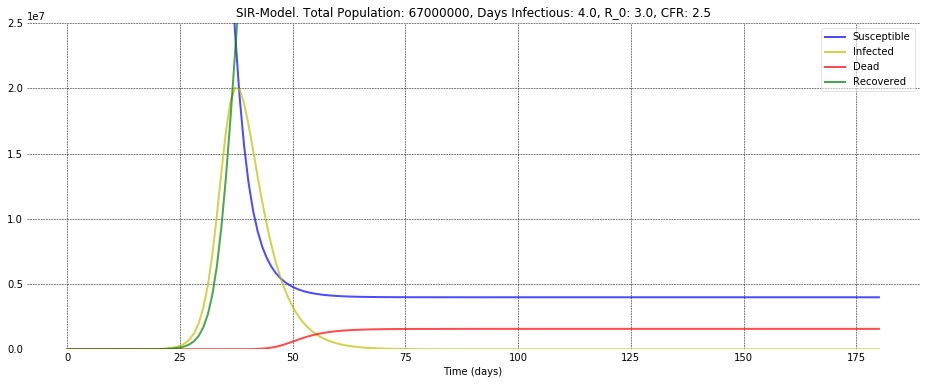

In [4]:
SIR_model(N=67000000, D=4.0, R_0=3.0, CaseFatalityRate=0.025, max_days=180, figsize=(16,6), log_y_axis=False, ylimit=(0.0, 2.5e07))

[STATS] Fatalities::     5523
[STATS] Infected::    22010
[STATS] Recovered::   223866


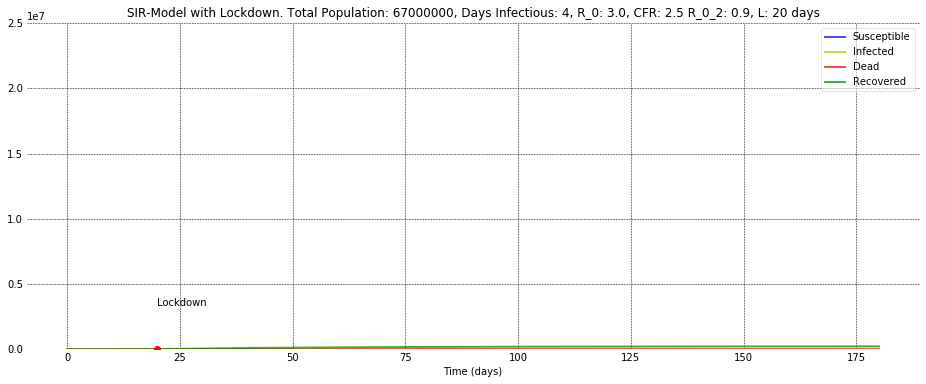

[STATS] Fatalities::    58389
[STATS] Infected::   265939
[STATS] Recovered::  2359577


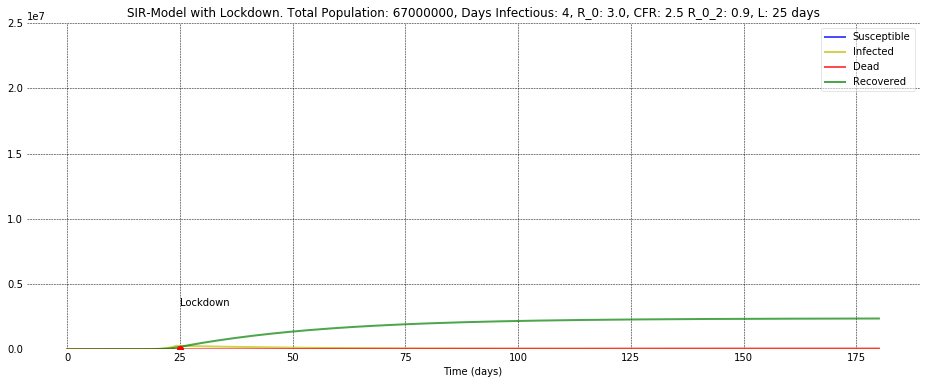

[STATS] Fatalities::   357565
[STATS] Infected::  2943023
[STATS] Recovered:: 14408869


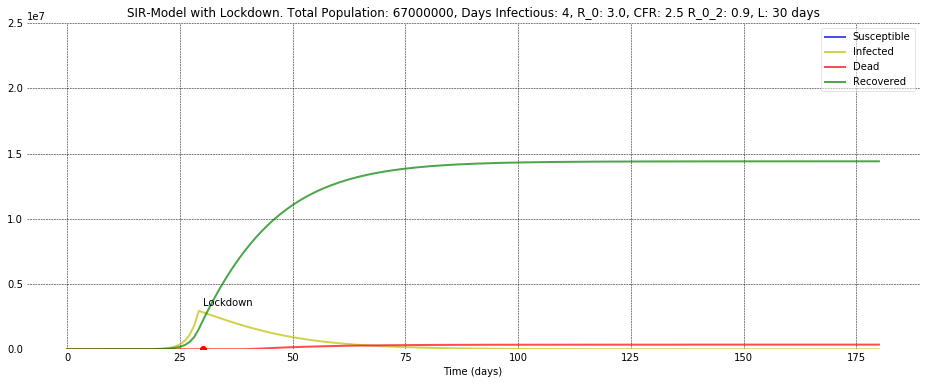

[STATS] Fatalities::  1007076
[STATS] Infected:: 16155897
[STATS] Recovered:: 40728019


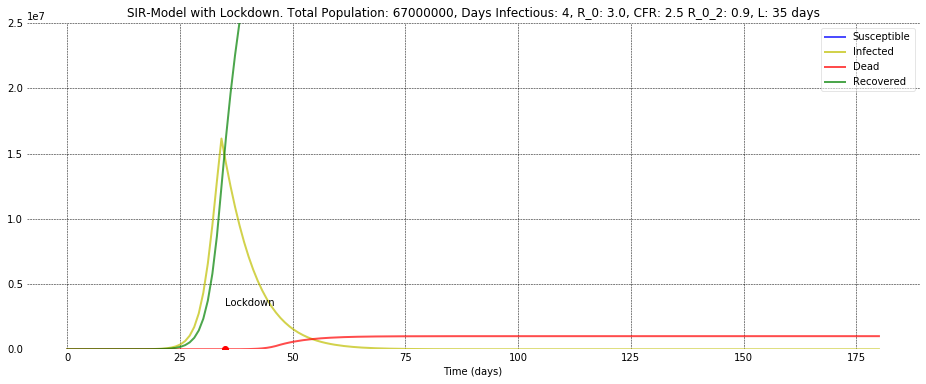

[STATS] Fatalities::  1398735
[STATS] Infected:: 20056258
[STATS] Recovered:: 56963372


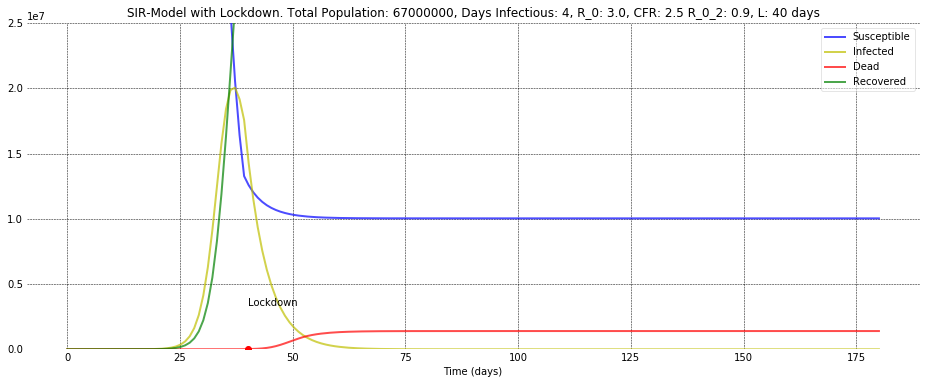

[STATS] Fatalities::  1501086
[STATS] Infected:: 20093243
[STATS] Recovered:: 61260867


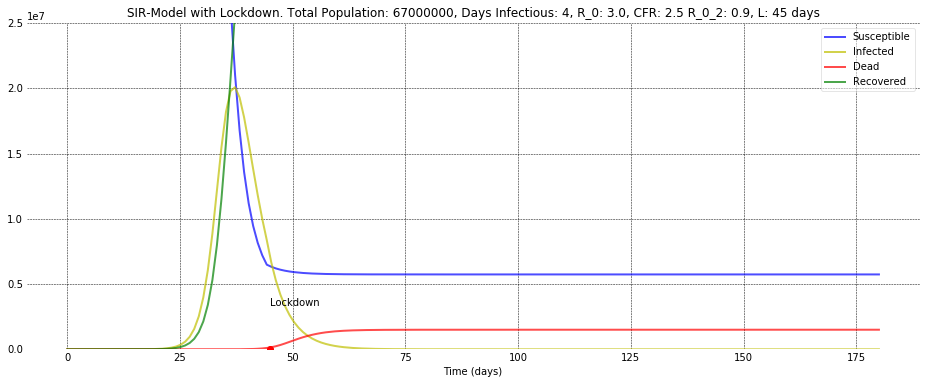

In [7]:
for lockdown in [20, 25, 30, 35, 40, 45]:
    SIR_model_with_lockdown(N=67_000_000, D=4, R_0=3.0, CaseFatalityRate=0.025, max_days=180, L=lockdown, R_0_2=0.9, 
                            figsize=(16,6), log_y_axis=False, ylimit=(0.0, 2.5e07))

In [10]:
# Load countries data file (from https://www.kaggle.com/saga21/covid-global-forecast-sir-model-ml-regressions)
world_population = pd.read_csv("data/population_by_country_2020.csv")

# Select desired columns and rename some of them
world_population = world_population[['Country (or dependency)', 'Population (2020)', 'Density (P/Km²)', 'Land Area (Km²)', 'Med. Age', 'Urban Pop %']]
world_population.columns = ['Country (or dependency)', 'Population (2020)', 'Density', 'Land Area', 'Med Age', 'Urban Pop']

# Replace United States by US
world_population.loc[world_population['Country (or dependency)']=='United States', 'Country (or dependency)'] = 'US'

# Remove the % character from Urban Pop values
world_population['Urban Pop'] = world_population['Urban Pop'].str.rstrip('%')

# Replace Urban Pop and Med Age "N.A" by their respective modes, then transform to int
world_population.loc[world_population['Urban Pop']=='N.A.', 'Urban Pop'] = int(world_population.loc[world_population['Urban Pop']!='N.A.', 'Urban Pop'].mode()[0])
world_population['Urban Pop'] = world_population['Urban Pop'].astype('int16')
world_population.loc[world_population['Med Age']=='N.A.', 'Med Age'] = int(world_population.loc[world_population['Med Age']!='N.A.', 'Med Age'].mode()[0])
world_population['Med Age'] = world_population['Med Age'].astype('int16')